In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import pandas as pd

# Titanic DataSet

In [2]:
df=pd.read_csv("D:\\python\\titanic\\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# separation of Continuous variable column and categorical variables

In [6]:
import numpy as np

In [7]:
df_num=df.select_dtypes(include=[np.number])

# Continuous Variable columns

In [8]:
df_num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
df_cat=df.select_dtypes(include="object")

# Categorical Variable Columns

In [10]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# IMPUTATION-finding the null values

In [11]:
df_num.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# Applying median for all the null values

In [12]:
median_age=df_num["Age"].median()
df_num["Age"]=df_num["Age"].fillna(median_age)

In [13]:
df_num.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# Removing the datapoints which are more than 75% and less than 25%

In [14]:
df_num["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
df_Fare=df_num[(df_num["Fare"]>7.91)&(df_num["Fare"]<31)]

# Plotting Boxplot after Removal

<Axes: ylabel='Fare'>

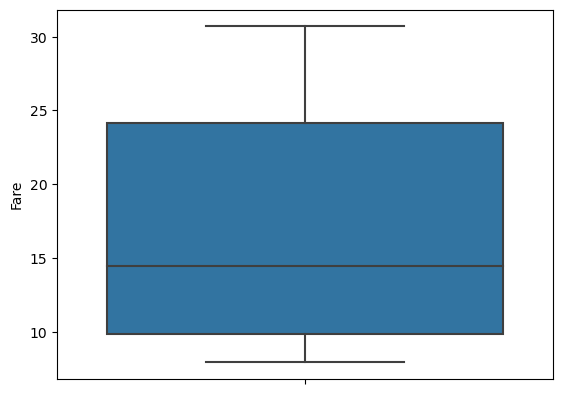

In [16]:
sns.boxplot(y=df_Fare["Fare"])

# Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
sco=sc.fit(df_Fare)

In [20]:
df_num_standard_scaler=sco.fit_transform(df_Fare)

<Axes: >

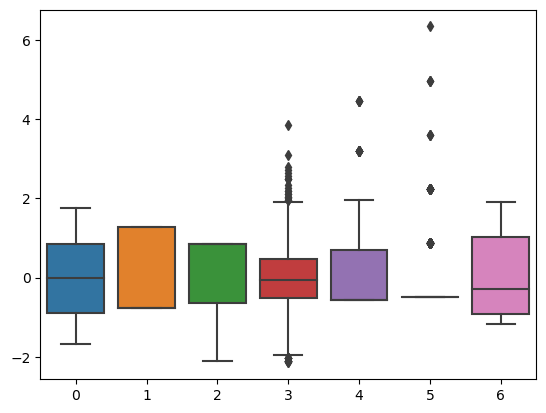

In [21]:
sns.boxplot(df_num_standard_scaler)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms=MinMaxScaler()

In [24]:
mmso=mms.fit(df_Fare)

In [25]:
df_num_minmax_scaler=mmso.fit_transform(df_Fare)

# MinMax Scaler

<Axes: >

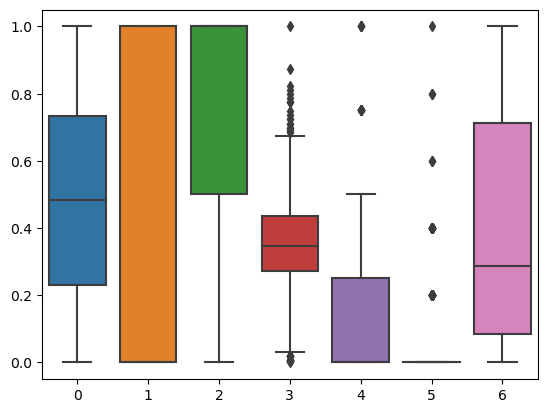

In [26]:
sns.boxplot(df_num_minmax_scaler)

# Categorical Variable Columns

In [27]:
df_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Finding Null values in Categorical variables

In [28]:
df_cat.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

# Replacing Null values with Mode or Dropping the values if there are more null values in the columns

In [29]:
df_cat['Cabin'].fillna(df_cat['Cabin'].value_counts().idxmax(),inplace=True)

In [30]:
df_cat['Embarked'].fillna(df_cat['Embarked'].value_counts().idxmax(),inplace=True)

In [31]:
df_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96 B98,S


In [32]:
df_cat['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [33]:
df_cat['Sex'].unique()

array(['male', 'female'], dtype=object)

In [34]:
df_cat['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df_cat1=df_cat.apply(le.fit_transform)

In [38]:
df_cat1.head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,47,2
1,190,0,596,81,0
2,353,0,669,47,2
3,272,0,49,55,2
4,15,1,472,47,2


In [39]:
df_Fare.shape

(443, 7)

In [40]:
df_cat1.shape

(891, 5)

In [41]:
df_cat1_op=df_cat1.loc[df_Fare.index.values,:]

In [42]:
df_cat1_op.shape

(443, 5)

In [43]:
df_Final=pd.concat([df_Fare,df_cat1_op],axis=1)

In [44]:
df_Final.shape

(443, 12)

# Final DataSet

In [45]:
df_Final

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
2,3,1,3,26.0,0,0,7.9250,353,0,669,47,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,47,2
5,6,0,3,28.0,0,0,8.4583,554,1,275,47,1
7,8,0,3,2.0,3,1,21.0750,624,1,395,47,2
8,9,1,3,27.0,0,2,11.1333,412,0,344,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,684,0,480,47,1
886,887,0,2,27.0,0,0,13.0000,548,1,101,47,2
887,888,1,1,19.0,0,0,30.0000,303,0,14,30,2
888,889,0,3,28.0,1,2,23.4500,413,0,675,47,2
